## CSE 6040 - Extra Credit Project | Tyler J. Netek

### Checklist:

### Not-exhaustive project checklist

### Note: this is not a writing assignment, but you should still incorporate comments or headers throughout

### -- This will help others who review your work, but will also help you keep track of what you're doing

### -- Just think about what would help you understand a peer's project when you have to grade theirs later





##### 1) Dataset included - "Pokemon.csv" ✅

##### 1a) Dataset explained/documented when used - ✅

##### 2) Analysis performed - ✅

##### 2a) Analysis steps documented, explained briefly - ✅

##### 3) Visualizations/outputs - ✅

#### 4) Conclusion

##### ---Did you answer your questions? Yes, I did. I was incorrect in my predictions aside form Legendary most 
#####powerful type. Legendaries Included Type: Dragon, Legendaries not included Type: Dragon, Legendaries per generation
#####Displayed below (there are 7), Non-Legendaries per generation Displayed below (there are 7). Also wrong here.
##### Type of the most powerful pokemon/generation was Dragon, followed by Water at second. So there is some commonality there.
##### ---Did you find anything else? Normal very clearly had the biggest difference from weakest to strongest,
##### but to me that totally makes sense. When you start any pokemon game, almost all of the starting pokemon are
##### either normal, poison, or bug (which turned out to be the weakest), which likely deducted from their rankings.
##### but there are some really strong normal pokemon too like Snorlax, Slaking, and Arceus.

##### ---What problems did you run into? Wishi washi being the most powerful for 7 definitely seems off, but I could
##### not pinpoint what was causing that in the data. Perhaps it is an issue with the data, due to the other gens seeming
##### to be correct based on my pokemon knowledge.

##### ---Any suggestions for future research? For future research I'd definitely like to expand the scope, and go more
##### in-depth. I love doing projects with pokemon because there is just so much data and so much room for creativity.



#### Critical checks before submission

#### - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?) ✅

#### - Do you have your dataset included here? You shouldn't be connecting to any external data ✅

#### - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0. ✅

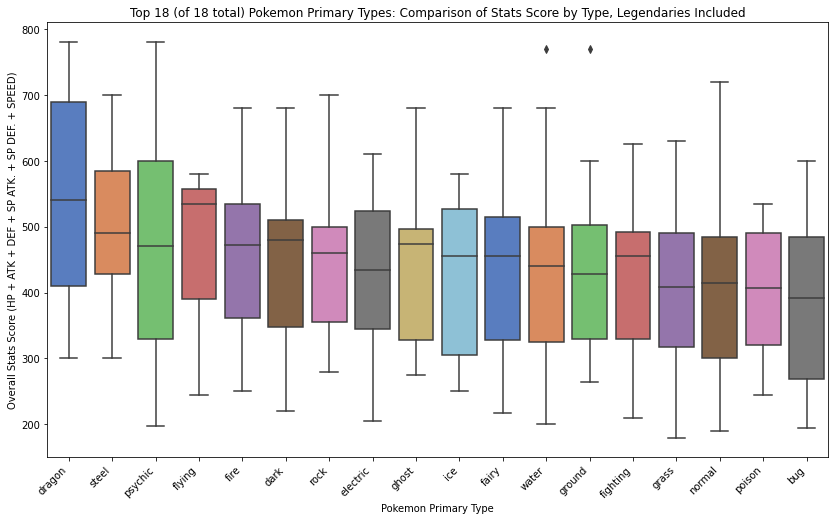

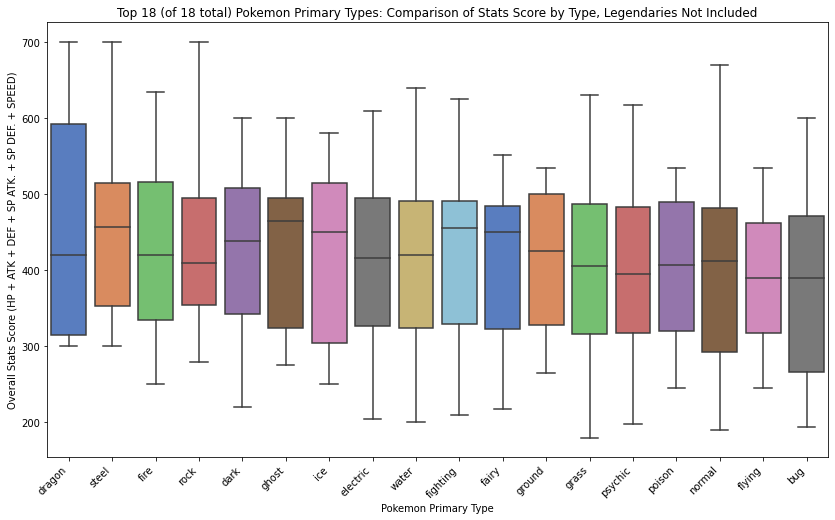

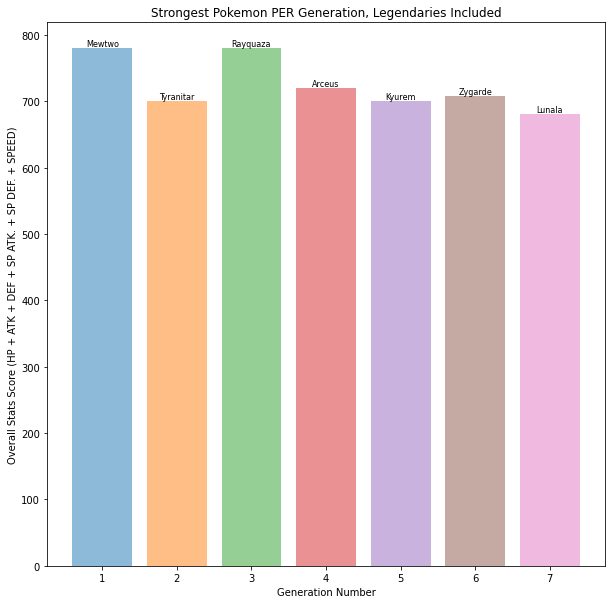

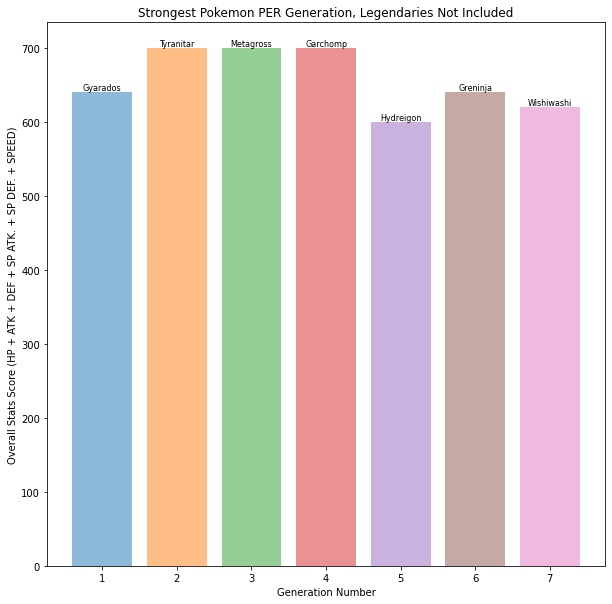



Summary of Statistical Analysis:


       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000       

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#COMMENTED OUT NOTE: I'm leaving the commented out code from the pokeAPI stuff, so that I can uncomment it after and
#add it to my personal github as is discussed in the rubric. I wanted to collect the sprites via pokeAPI, but then 
#after reviewing the rubric, I realized that I would be breaking the rules of the project due to the API requiring 
#internet access. 

#The below libraries were used for trying to parse the pokemon sprites from pokeAPI (which I have used in a personal 
#project, but I commented all of that code out upon further review of the rubric.

# import requests
# from io import BytesIO
# from PIL import Image

#What's the problem? 
#There are so many Pokemon! If you want to battle your friends, it is so difficult to decide what
#Pokemon you should include in your team. I wanted to provide assistance by visualizing the most powerful types,
#as well as the most powerful pokemon per generation (including legendaries & not including legendaries), because
#some people do not like to battle with legendaries due to them being so strong that they easily defeat most non-
#legendaries.

#Question: What is the most powerful pokemon type, and what do the most powerful pokemon have in common
#that makes them so powerful?

#Hypothesis: When I think about most legendary pokemon, almost all of them are some sort of Dragon. I assume
#that at least when measuring legendary pokemon, that the most powerful type will be Dragon. For non-legendaries,
#I think it will either be water, fire, or grass because of how powerful some of the starter pokemon become.
#For the most powerful pokemon including legendaries, I think it will be Groudon just because he's massive.
#For non-legendaries, I immediately think Charizard, but that's not a confident pick due to him being all the way
#back from generation 1. I assume it will at least be a pokemon with a third evolution.


#Creating our class, so that our code is organized.
class PokemonDataAnalysis:
    def __init__(self):
        self.data = None
    
    #No longer needed due to pokeAPI being removed
        
#     def resize_image(self, image_path, new_size=(20, 20)):
#         image = Image.open(image_path)
#         aspect_ratio = image.width / image.height
#         if aspect_ratio > 1:
#             new_width = new_size[0]
#             new_height = int(new_size[0] / aspect_ratio)
#         else:
#             new_height = new_size[1]
#             new_width = int(new_size[1] * aspect_ratio)
#         resized_image = image.resize((new_width, new_height))
#         return resized_image


    #Organizing and cleaning data prior to visualization. I am using a dataset called pokemon.csv from Kaggle.
    #The columns are displayed below:
    #abilities, against_bug, against_dark, against_dragon, against_electric, against_fairy, against_fight, 
    #against_fire, against_flying, against_ghost, against_grass, against_ground, against_ice, against_normal, 
    #against_poison, against_psychic, against_rock, against_steel, against_water, attack, base_egg_steps, 
    #base_happiness, base_total, capture_rate, classfication, defense, experience_growth, height_m, hp, 
    #japanese_name, name, percentage_male, pokedex_number, sp_attack, sp_defense, speed, type1, type2, weight_kg, 
    #generation, is_legendary

    def fetch_csv_data(self, file_path="Pokemon.csv"):
        self.data = pd.read_csv(file_path)
        self.clean_pokemon_data()
        self.calculate_scores()

    def clean_pokemon_data(self):
        numeric_columns = self.data.select_dtypes(include='number').columns
        self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].mean())
        self.data['percentage_male'] = pd.to_numeric(self.data['percentage_male'], errors='coerce')
        self.data.rename(columns={'type1': 'Type 1', 'type2': 'Type 2'}, inplace=True)
        
        
    #Adding up all of the stats
    def calculate_scores(self):
        relevant_stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
        self.data['Overall_Score'] = self.data[relevant_stats].sum(axis=1)
        
    #No longer being used, but included for use on github.

#     def fetch_pokemon_sprite(self, pokedex_number):
#         url = f"https://pokeapi.co/api/v2/pokemon/{pokedex_number}/"
#         response = requests.get(url)
#         if response.status_code == 200:
#             data = response.json()
#             sprite_url = data['sprites']['front_default']
#             return sprite_url
#         else:
#             print(f"Failed to fetch sprite for Pokemon with Pokedex Number {pokedex_number}")
#             return None
    
    #Here we will create a boxplot graph using seaborn, in order to rank the types but also show the range
    #from weakest pokemon in the type to greatest pokemon in the type. Why is this important?
    #Well if a type is overall strong, not just one pokemon within the type, then the user may feel safer choosing
    #from that type of pokemon. If there is a big discrepancy between the strongest and weakest of that type,
    #the user may be more cautious when choosing pokemon belonging to that type.
    #We will also be able to select if we want to include legendaries which will likely skew the results one
    #way or the other.
    def visualize_scores(self, top_n=18, include_legendaries=True):
        filtered_data = self.data if include_legendaries else self.data[self.data['is_legendary'] == 0]
        average_score_by_type = filtered_data.groupby('Type 1')['Overall_Score'].mean().sort_values(ascending=False)
        top_types = average_score_by_type.head(top_n).index

        plt.figure(figsize=(14, 8))
        sns.boxplot(x='Type 1', y='Overall_Score', data=filtered_data, order=top_types, palette='muted')
        if include_legendaries:
            plt.title(f'Top {top_n} (of 18 total) Pokemon Primary Types: Comparison of Stats Score by Type, Legendaries Included')
        else:
            plt.title(f'Top {top_n} (of 18 total) Pokemon Primary Types: Comparison of Stats Score by Type, Legendaries Not Included')
        plt.xlabel('Pokemon Primary Type')
        plt.ylabel('Overall Stats Score (HP + ATK + DEF + SP ATK. + SP DEF. + SPEED)')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    
    
    
    #Here we will create a bar chart with an x-axis of generation (by opting to select only 1 per generation, which can)
    #be changed technically, but is not necessary for this analysis or this type of chart. The y-axis will be similar
    #to our other visualization type, being the overall sum of the stats.
    def visualize_strongest_per_generation(self, top_n=1, include_legendaries=True):
        filtered_data = self.data if include_legendaries else self.data[self.data['is_legendary'] == 0]
        strongest_per_generation = filtered_data.groupby(['generation', 'name', 'pokedex_number'])['Overall_Score'].max().reset_index()
        top_pokemon_per_generation = strongest_per_generation.groupby('generation').apply(lambda x: x.nlargest(top_n, 'Overall_Score')).reset_index(drop=True)
        # sprite_urls = [self.fetch_pokemon_sprite(row['pokedex_number']) for _, row in top_pokemon_per_generation.iterrows()]

        fig, ax = plt.subplots(figsize=(10, 10))
        for i, (index, row) in enumerate(top_pokemon_per_generation.iterrows()):
            # sprite_url = sprite_urls[i]
            # if sprite_url:
            #     response = requests.get(sprite_url)
            #     image_path = BytesIO(response.content)
            #     resized_image = self.resize_image(image_path, new_size=(96, 96))
            #     imagebox = OffsetImage(resized_image, zoom=0.5)

            ax.bar(row['generation'], row['Overall_Score'], alpha=0.5)
            # ab = AnnotationBbox(imagebox, (row['generation'], row['Overall_Score']),
            #                     frameon=False, xycoords='data', boxcoords="data", pad=0)
            # ax.add_artist(ab)
            ax.text(row['generation'], row['Overall_Score'], row['name'], ha='center', va='bottom', fontsize=8)

        ax.set_xlabel('Generation Number')
        ax.set_ylabel('Overall Stats Score (HP + ATK + DEF + SP ATK. + SP DEF. + SPEED)')
        if include_legendaries:
            ax.set_title("Strongest Pokemon PER Generation, Legendaries Included")
        else:
            ax.set_title("Strongest Pokemon PER Generation, Legendaries Not Included")
        ax.set_xticks(top_pokemon_per_generation['generation'].unique())
        plt.show()

    def return_summary(self):
        statistics_summary = self.data.describe()
        correlation_matrix = self.data.corr()
        
        print("\n\nSummary of Statistical Analysis:\n\n")
        print(statistics_summary)
        print("\n\nCorrelation Matrix:\n\n")
        print(correlation_matrix)

if __name__ == "__main__":
    analysis = PokemonDataAnalysis()
    analysis.fetch_csv_data()
    analysis.visualize_scores()
    analysis.visualize_scores(include_legendaries=False)
    analysis.visualize_strongest_per_generation(include_legendaries=True)
    analysis.visualize_strongest_per_generation(include_legendaries=False)
    analysis.return_summary()


#Analysis:    
    
# - Did you answer your questions? Yes, I did. I was incorrect in my predictions aside form Legendary most 
#powerful type. Legendaries Included Type: Dragon, Legendaries not included Type: Dragon, Legendaries per generation
#Displayed below (there are 7), Non-Legendaries per generation Displayed below (there are 7). Also wrong here.
#Type of the most powerful pokemon/generation was Dragon, followed by Water at second. So there is some commonality there.

# - Did you find anything else? Normal very clearly had the biggest difference from weakest to strongest,
# but to me that totally makes sense. When you start any pokemon game, almost all of the starting pokemon are
# either normal, poison, or bug (which turned out to be the weakest), which likely deducted from their rankings.
# but there are some really strong normal pokemon too like Snorlax, Slaking, and Arceus.

# - What problems did you run into? Wishi washi being the most powerful for 7 definitely seems off, but I could
# not pinpoint what was causing that in the data. Perhaps it is an issue with the data, due to the other gens seeming
# to be correct based on my pokemon knowledge.

# - Any suggestions for future research? For future research I'd definitely like to expand the scope, and go more
# in-depth. I love doing projects with pokemon because there is just so much data and so much room for creativity.



### Remember: the project rules and rubric are documented in Piazza post @2381. If you have any questions you should ask them there. The checklist above is just an example of a template/workflow we would use.

### You do not need to use this template. You can delete it and upload your own notebook if you want. If you already created a notebook locally, you may upload it directly into Vocareum and delete this one when you submit. Or you may copy your code into here from that notebook, it doesn't make a difference. Your peers will see the entirety of what's in this work area, so the notebook name doesn't matter.